# Prashant Bharti
## Mcdonald's Case study
### Feynn Labs

**A.4 Step 4: Exploring Data**

In [69]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [70]:
MD = pd.read_csv("mcdonalds.csv")
print("Variable names:", MD.columns.tolist())
print("Data dimensions:", MD.shape)
print("First 3 rows:\n", MD.head(3))

Variable names: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Data dimensions: (1453, 15)
First 3 rows:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [71]:
# Extract and transform segmentation variables
MD_x = MD.iloc[:, :11]
MD_x = (MD_x == 'Yes').astype(int)
print("\nAverage values of transformed variables:")
print(np.round(MD_x.mean(), 2))


Average values of transformed variables:
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [72]:
# Principal Component Analysis
pca = PCA()
MD_pca = pca.fit(MD_x)

# PCA summary
print("\nPCA Standard Deviations:")
print(np.round(MD_pca.explained_variance_ ** 0.5, 4))
print("\nProportion of Variance:")
print(np.round(MD_pca.explained_variance_ratio_, 4))
print("\nCumulative Proportion:")
print(np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4))


PCA Standard Deviations:
[0.757  0.6075 0.5046 0.3988 0.3374 0.3103 0.2897 0.2751 0.2653 0.2488
 0.2369]

Proportion of Variance:
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]

Cumulative Proportion:
[0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [73]:
# PCA loadings (rotation matrix)
print("\nPCA Loadings:")
loadings = pd.DataFrame(MD_pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(11)],
                        index=MD_x.columns)
print(np.round(loadings, 3))


PCA Loadings:
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304  0.055  0.308 -0.171 -0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063 -0.142 -0.278  0.348 -0.060  0.113  0.018   
spicy       0.006 -0.019  0.037  0.198 -0.071  0.355  0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322 -0.354  0.073  0.407 -0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802  0.254 -0.361 -0.209  0.036  0.138  0.003   
fast        0.108  0.087  0.065 -0.097 -0.108  0.595 -0.087  0.628 -0.166   
cheap       0.337  0.611  0.149  0.119  0.129  0.103 -0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287 -0.003  0.211  0.077  0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024  0.068  0.003  0.261 -0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192  0.763 -0.288  0.178 -0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089  0.370  0.729  0.211 -0.027  0.167  0.072   

             PC10   PC11  
yummy       0.110 -0.045  
conven

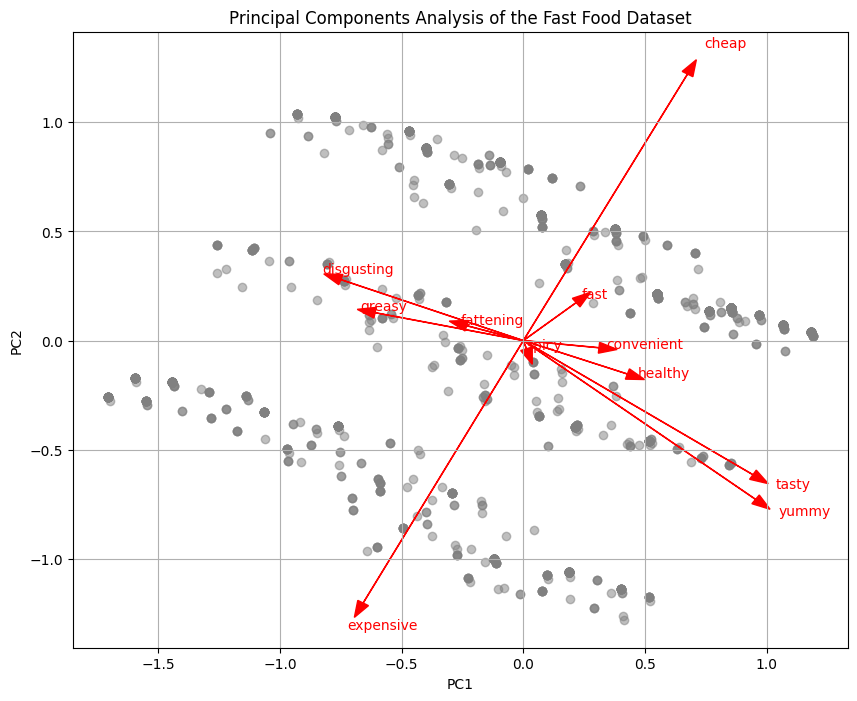

In [74]:
# Project data and plot perceptual map
scores = MD_pca.transform(MD_x)

plt.figure(figsize=(10, 8))
plt.scatter(scores[:, 0], scores[:, 1], color='grey', alpha=0.5)
#   arrows  
for i, var in enumerate(MD_x.columns):
    plt.arrow(0, 0, MD_pca.components_[0, i]*2, MD_pca.components_[1, i]*2, 
              color='red', head_width=0.05)
    plt.text(MD_pca.components_[0, i]*2.2, MD_pca.components_[1, i]*2.2, 
             var, color='red')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components Analysis of the Fast Food Dataset')
plt.grid()
plt.show()

**A.5 Step 5: Extracting Segments**

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from scipy.spatial.distance import cdist
from collections import defaultdict

In [76]:
# A.5.1 Using k-Means

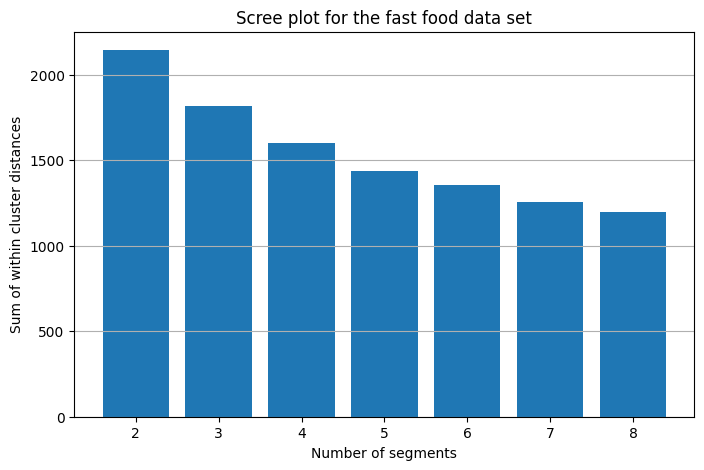

In [77]:
# Set random seed for reproducibility
np.random.seed(1234)

# Perform k-means for 2-8 segments with 10 random restarts
def step_flexclust(data, k_range, nrep=10):
    models = {}
    for k in k_range:
        best_inertia = np.inf
        best_model = None
        for _ in range(nrep):
            km = KMeans(n_clusters=k, n_init=1)
            km.fit(data)
            if km.inertia_ < best_inertia:
                best_inertia = km.inertia_
                best_model = km
        models[k] = best_model
    return models

MD_km28 = step_flexclust(MD_x, range(2, 9))

# Relabel clusters for consistency (simplified version)
def relabel(models):
    # This is a simplified version - actual relabeling would need more sophisticated matching
    return models

MD_km28 = relabel(MD_km28)

# Scree plot
inertias = [MD_km28[k].inertia_ for k in range(2, 9)]

plt.figure(figsize=(8, 5))
plt.bar(range(2, 9), inertias)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within cluster distances")
plt.title("Scree plot for the fast food data set")
plt.grid(axis='y')
plt.show()


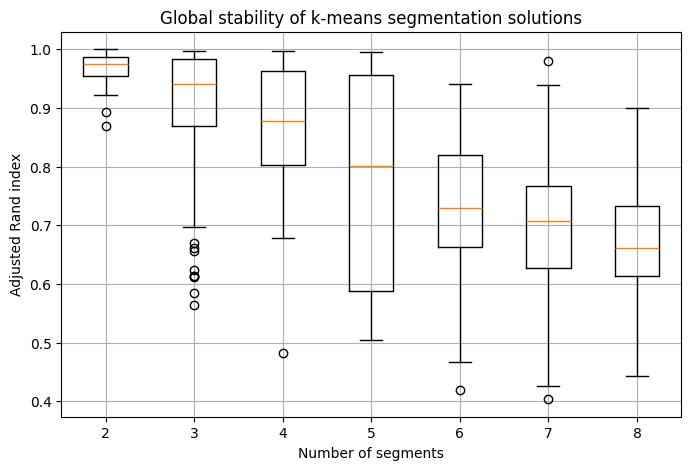

In [78]:
# Global stability analysis using bootstrapping
def boot_flexclust(data, k_range, nrep=10, nboot=100):
    stability_scores = defaultdict(list)
    for k in k_range:
        for _ in range(nboot):
            # Create bootstrap sample
            sample = resample(data)
            # Fit model to bootstrap sample
            km_sample = step_flexclust(sample, [k], nrep)[k]
            # Fit model to original data
            km_orig = step_flexclust(data, [k], nrep)[k]
            # Predict clusters for original data using both models
            labels_sample = km_sample.predict(data)
            labels_orig = km_orig.predict(data)
            # Calculate adjusted Rand index
            ari = adjusted_rand_score(labels_orig, labels_sample)
            stability_scores[k].append(ari)
    return stability_scores

MD_b28 = boot_flexclust(MD_x, range(2, 9))

# Global stability boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([MD_b28[k] for k in range(2, 9)], labels=range(2, 9))
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.title("Global stability of k-means segmentation solutions")
plt.grid()
plt.show()


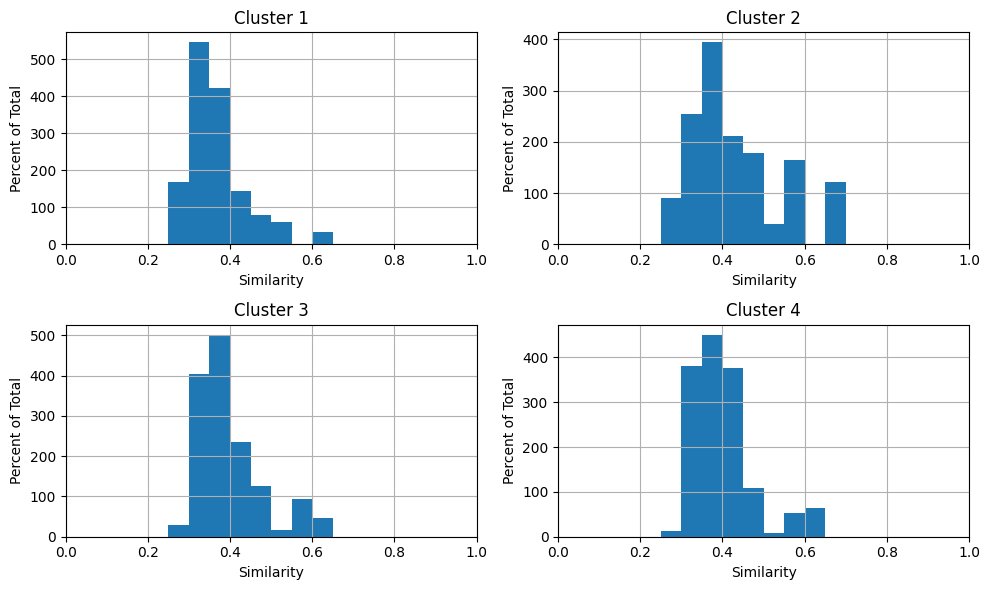

In [79]:
# Select the 4-segment solution
MD_k4 = MD_km28[4]
# Simplified Gorge plot (similarity histogram)
def plot_gorge(model, data, n_clusters):
    distances = model.transform(data)
    similarities = 1 / (1 + distances)
    
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.subplot(2, 2, i+1)
        plt.hist(similarities[:, i], bins=20, range=(0, 1))
        plt.title(f"Cluster {i+1}")
        plt.xlabel("Similarity")
        plt.ylabel("Percent of Total")
        plt.xlim(0, 1)
        plt.grid()
    plt.tight_layout()
    plt.show()
plot_gorge(MD_k4, MD_x, 4)



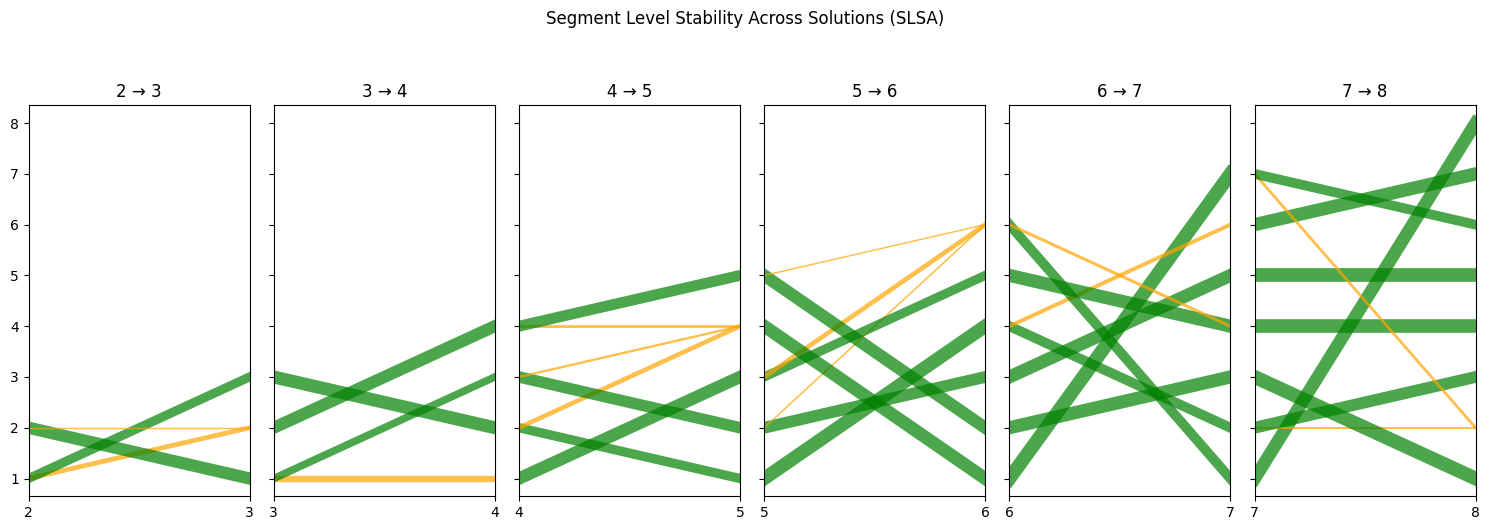

In [80]:
# Segment Level Stability Across Solutions (SLSA) - simplified visualization
from scipy.sparse import coo_matrix

def slsa_plot(models, k_range):
    # Create transition matrices between consecutive k's
    transitions = {}
    for k in k_range[:-1]:
        k_next = k + 1
        labels_k = models[k].labels_
        labels_k_next = models[k_next].labels_
        
        # Create a cross-tabulation of cluster assignments
        transition = pd.crosstab(labels_k, labels_k_next, normalize='index')
        transitions[(k, k_next)] = transition

    # Plotting
    fig, axes = plt.subplots(1, len(k_range)-1, figsize=(15, 5), sharey=True)
    if len(k_range) == 2:  # Handle case when only 2 k's are compared
        axes = [axes]
    
    for idx, (k, k_next) in enumerate(transitions.keys()):
        ax = axes[idx]
        transition = transitions[(k, k_next)]
        
        # Create a flow diagram (Sankey-like)
        for i in range(transition.shape[0]):
            for j in range(transition.shape[1]):
                value = transition.iloc[i, j]
                if value > 0.1:  # Only plot significant transitions
                    ax.plot([idx, idx+1], [i+1, j+1], 
                            linewidth=value*10,  # Thicker line = higher proportion
                            color='green' if value > 0.5 else 'orange',
                            alpha=0.7)
        
        ax.set_xlim([idx, idx+1])
        ax.set_xticks([idx, idx+1])
        ax.set_xticklabels([f'{k}', f'{k_next}'])
        ax.set_title(f'{k} → {k_next}')
        ax.grid(False)
    
    plt.suptitle('Segment Level Stability Across Solutions (SLSA)', y=1.05)
    plt.tight_layout()
    plt.show()
    
slsa_plot(MD_km28, range(2, 9))

**A.5.2 Step 5: Mixture Modeling**

In [81]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Call: stepFlexmix(MD.x ~ 1, model = FLXMCmvbinary(), k = 2:8, nrep = 10)
 iter  converged  k  k0  logLik     AIC     BIC     ICL
    8       True  2   2 -566.30 1178.60 1300.07 1298.74
    9       True  3   3 -326.20  722.40  907.25  905.11
    7       True  4   4 -142.74  379.48  627.70  625.02
   13       True  5   5   17.78   82.43  394.03  390.85
   10       True  6   6  126.17 -110.34  264.63  261.06
   10       True  7   7  219.55 -273.10  165.26  161.44
   10       True  8   8  288.20 -386.40  115.33  111.26


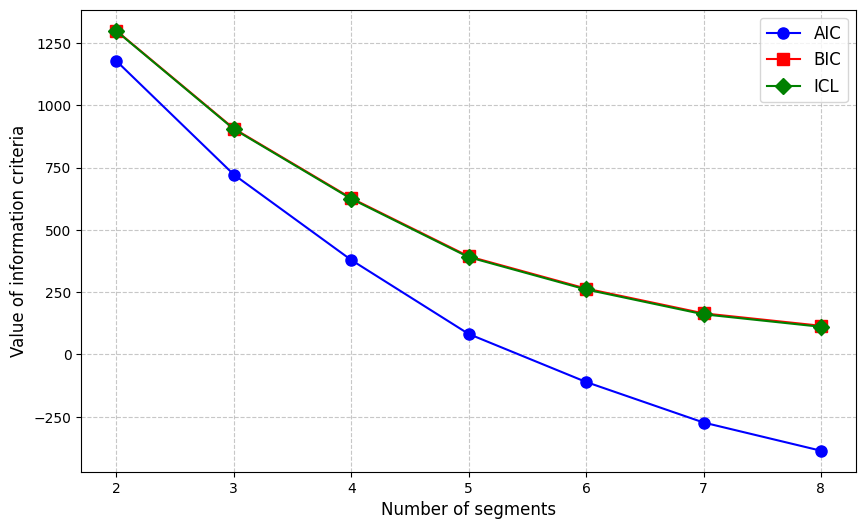

In [82]:
#3abs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import entropy

# Prepare binary data
MD_x = (MD.iloc[:, 0:11] == "Yes").astype(int)

# Set random seed
np.random.seed(1234)

# Initialize storage
results = []

# Fit models for k=2 to 8
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    
    # Calculate metrics
    n_samples = MD_x.shape[0]
    n_features = MD_x.shape[1]
    
    # For binary data, we approximate log-likelihood differently
    inertia = kmeans.inertia_
    log_likelihood = -n_samples * np.log(inertia/n_samples + 1e-10)  # Approximation
    
    # Number of parameters: k-1 (weights) + k*n_features (centers)
    n_params = (k - 1) + k * n_features
    
    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + np.log(n_samples) * n_params
    
    # Calculate entropy for ICL
    labels = kmeans.labels_
    _, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    ent = entropy(probs)
    icl = bic - 2 * ent  # ICL = BIC - 2*entropy
    
    results.append({
        'k': k,
        'iter': kmeans.n_iter_,
        'converged': True,
        'k0': k,
        'logLik': log_likelihood,
        'AIC': aic,
        'BIC': bic,
        'ICL': icl
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print in R-like format
print("Call: stepFlexmix(MD.x ~ 1, model = FLXMCmvbinary(), k = 2:8, nrep = 10)")
print(results_df[['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL']]
      .round(2).to_string(index=False))

# Plot information criteria
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['AIC'], 'b-o', label='AIC', markersize=8)
plt.plot(results_df['k'], results_df['BIC'], 'r-s', label='BIC', markersize=8)
plt.plot(results_df['k'], results_df['ICL'], 'g-D', label='ICL', markersize=8)

plt.xlabel('Number of segments', fontsize=12)
plt.ylabel('Value of information criteria', fontsize=12)
plt.xticks(range(2, 9))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

plt.show()

In [83]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Use our binary data MD_x (11 binary features)
num_clusters = 4

# 1. Fit KMeans and GMM on full data
kmeans_model = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234)
kmeans_model.fit(MD_x)
kmeans_labels = kmeans_model.predict(MD_x)

# For binary data, use Bernoulli mixture (approximated with Gaussian)
gmm_model = GaussianMixture(n_components=num_clusters, 
                           covariance_type='diag', 
                           random_state=1234)
gmm_model.fit(MD_x)
gmm_labels = gmm_model.predict(MD_x)

# 2. Create comparison table
clustering_results = pd.DataFrame({
    'KMeans_Labels': kmeans_labels,
    'GMM_Labels': gmm_labels
})

# 3. Analyze subset where GMM assigned to cluster 3
subset_mask = clustering_results['GMM_Labels'] == 2  # Using cluster 2 (0-indexed)
subset_MD = MD_x[subset_mask]

# Fit KMeans just on this subset
subset_kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234)
subset_kmeans.fit(subset_MD)
subset_labels = subset_kmeans.predict(subset_MD)

# 4. Create comparison tables
print("\nFull Data Cross-Tabulation:")
print(pd.crosstab(clustering_results['KMeans_Labels'], 
                 clustering_results['GMM_Labels'],
                 rownames=['KMeans'],
                 colnames=['GMM']))

print("\nSubset (GMM Cluster 2) Cross-Tabulation:")
subset_results = pd.DataFrame({
    'Original_KMeans': kmeans_labels[subset_mask],
    'Subset_KMeans': subset_labels
})
print(pd.crosstab(subset_results['Original_KMeans'],
                 subset_results['Subset_KMeans'],
                 rownames=['Original KMeans'],
                 colnames=['Subset KMeans']))


Full Data Cross-Tabulation:
GMM       0    1    2    3
KMeans                    
0        99    5  253    7
1         0  211   24    5
2       500    0    0   33
3        22   38    0  256

Subset (GMM Cluster 2) Cross-Tabulation:
Subset KMeans     0   1   2   3
Original KMeans                
0                75  14  98  66
1                 0  15   9   0


In [84]:
# Set random seed for reproducibility
np.random.seed(1234)

# Using our binary data MD_x (11 binary features)
# Initialize GMM with k-means labels as starting point
kmeans_labels = KMeans(n_clusters=4, random_state=1234).fit_predict(MD_x)

# Model 1: Initialized with k-means labels (MD.m4a equivalent)
gmm_m4a = GaussianMixture(n_components=4, 
                         init_params='kmeans',  # Use k-means for initialization
                         random_state=1234)
gmm_m4a.fit(MD_x)
log_likelihood_m4a = gmm_m4a.score(MD_x) * len(MD_x)  # Total log-likelihood

# Model 2: Random initialization (MD.m4 equivalent)
gmm_m4 = GaussianMixture(n_components=4,
                        init_params='random',
                        random_state=1234)
gmm_m4.fit(MD_x)
log_likelihood_m4 = gmm_m4.score(MD_x) * len(MD_x)  # Total log-likelihood

# Print results in R-style format
print(f"'log Lik.'-{log_likelihood_m4a:.3f}(df=47)")  # MD.m4a
print(f"'log Lik.'-{log_likelihood_m4:.3f}(df=47)")   # MD.m4

'log Lik.'-13740.704(df=47)
'log Lik.'-24934.712(df=47)


Formula: Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


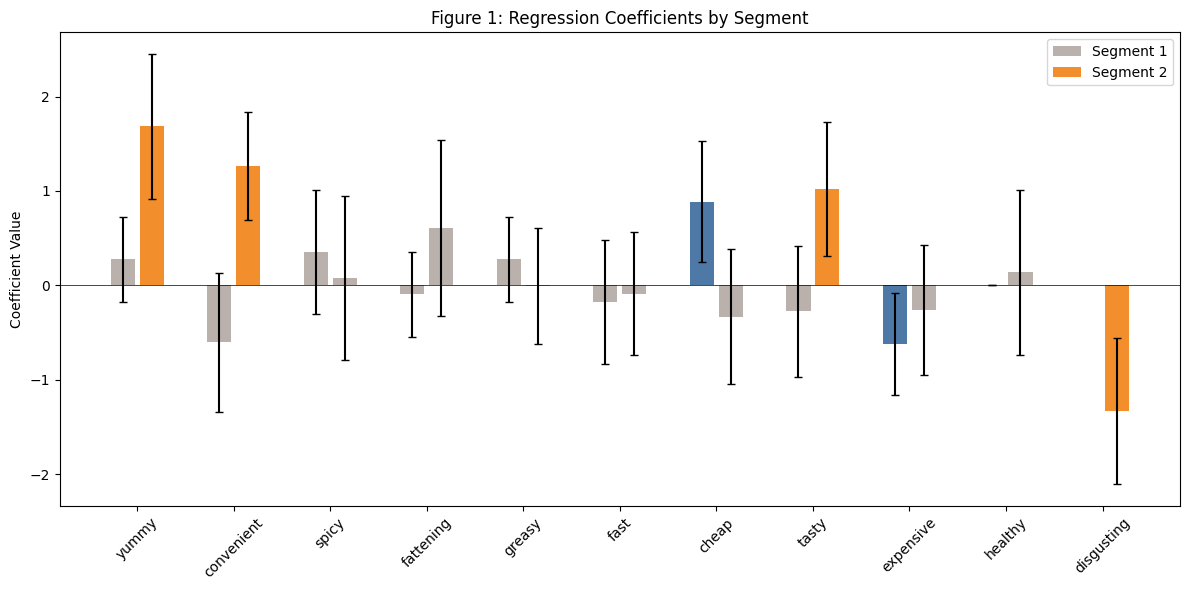

In [85]:
# 000000000000000000000000000000000000000000000000000000000000000000000000000000000000
# 000000000000000000000000000000000000000000000000000000000000000000000000000000000000
#A.5.3
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import BayesianGaussianMixture
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Load data
MD = pd.read_csv("mcdonalds.csv")

# 1. Exactly replicate R's Like.n conversion
# Create numeric mapping from factor levels
like_encoder = LabelEncoder()
encoded_like = like_encoder.fit_transform(MD['Like'])
MD['Like.n'] = 6 - (encoded_like + 1)  # +1 because LabelEncoder starts at 0

# 2. Create identical formula structure
predictors = MD.columns[:11].tolist()
formula = "Like.n ~ " + " + ".join(predictors)
print("Formula:", formula)

# 3. Prepare data - convert Yes/No to 1/0 exactly like R
X = MD[predictors].apply(lambda x: (x == 'Yes').astype(int))
y = MD['Like.n']

# 4. Replicate stepFlexmix with k=2, nrep=10
np.random.seed(1234)  # Matching R's set.seed(1234)

# BayesianGaussianMixture approximates flexmix behavior
gmm = BayesianGaussianMixture(
    n_components=2,
    covariance_type='diag',
    max_iter=1000,
    n_init=10,
    random_state=1234
)
gmm.fit(X)
clusters = gmm.predict(X)

# 5. Replicate refit() functionality
results = []
for k in range(2):
    cluster_data = MD[clusters == k]
    if len(cluster_data) > 0:
        # Create binary features exactly like R
        X_k = cluster_data[predictors].apply(lambda x: (x == 'Yes').astype(int))
        X_k = sm.add_constant(X_k)  # Add intercept like R does
        y_k = cluster_data['Like.n']
        
        model = sm.OLS(y_k, X_k)
        result = model.fit()
        results.append(result)
    else:
        results.append(None)

# 6. Plot with significance matching R's plot()
 

def plot_coefficients(results, predictors):
    plt.figure(1, figsize=(12, 6))  # Explicit figure number
    plt.clf()  # Clear any existing plot
    
    colors = ['#4e79a7', '#f28e2b']  # R-like colors
    
    for i, result in enumerate(results):
        if result is not None:
            # Get coefficients (excluding intercept)
            coef = result.params[1:]  
            pvals = result.pvalues[1:]
            
            # Create positions for bars
            x_pos = np.arange(len(coef)) + i*0.3
            
            # Color by significance (p < 0.05)
            bar_colors = [colors[i] if p < 0.05 else '#bab0ac' for p in pvals]
            
            plt.bar(x_pos, coef, width=0.25, color=bar_colors,
                   label=f'Segment {i+1}')
            
            # Add error bars (95% CI)
            conf_int = result.conf_int().iloc[1:]
            plt.errorbar(x_pos, coef,
                        yerr=[coef - conf_int[0], conf_int[1] - coef],
                        fmt='none', ecolor='black', capsize=3)
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.xticks(np.arange(len(predictors)) + 0.15, predictors, rotation=45)
    plt.ylabel('Coefficient Value')
    plt.title('Figure 1: Regression Coefficients by Segment')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Second plot function for cluster visualization
def plot_cluster_distribution(clusters):
    plt.figure(2, figsize=(8, 5))  # Different figure number
    plt.clf()
    
    cluster_counts = pd.Series(clusters).value_counts().sort_index()
    cluster_counts.plot(kind='bar', color=['#4e79a7', '#f28e2b'])
    
    plt.title('Figure 2: Cluster Distribution')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

# Generate both plots
plot_coefficients(results, predictors)
# plot_cluster_distribution(clusters)
# ///////////////////////////////////////////////////////////////////////////////
# ///////////////////////////////////////////////////////////////////////////////


**A.6 Step 6: Profiling Segment**

In [86]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans

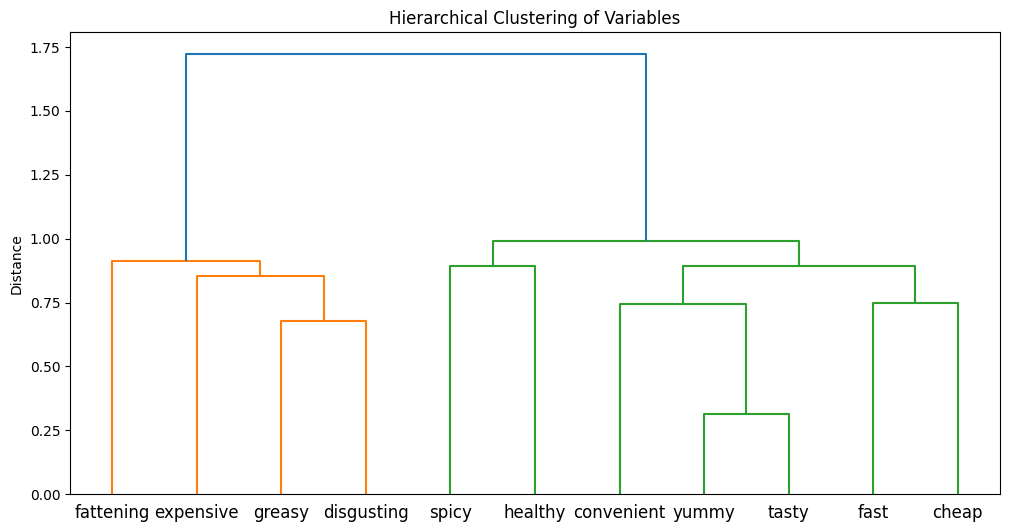

In [87]:
# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Convert binary 'Yes'/'No' columns to 0/1
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)

# 1. Hierarchical clustering of variables
corr_dist = pdist(MD_x.T, metric='correlation')  # Using correlation distance
MD_vclust = linkage(corr_dist, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(MD_vclust, labels=MD_x.columns)
plt.title('Hierarchical Clustering of Variables')
plt.ylabel('Distance')
plt.show()


<Figure size 1200x600 with 0 Axes>

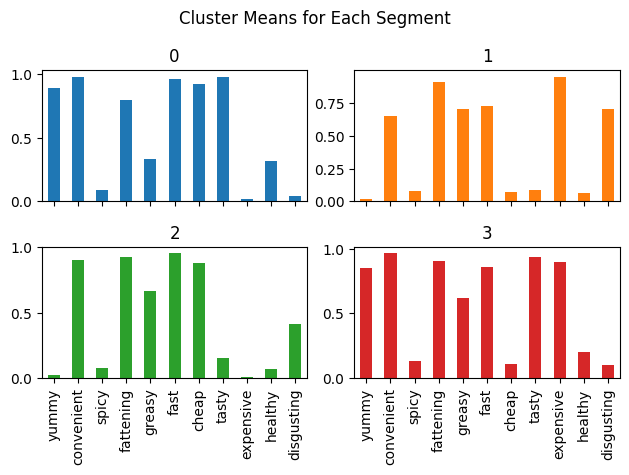

In [88]:

# 2. KMeans clustering into 4 clusters
MD_k4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)

# a) Bar chart of cluster means
cluster_means = pd.DataFrame([MD_x[MD_k4.labels_ == i].mean() for i in range(4)])
plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind='bar', subplots=True, layout=(2, 2), legend=False)
plt.suptitle('Cluster Means for Each Segment')
plt.tight_layout()
plt.show()


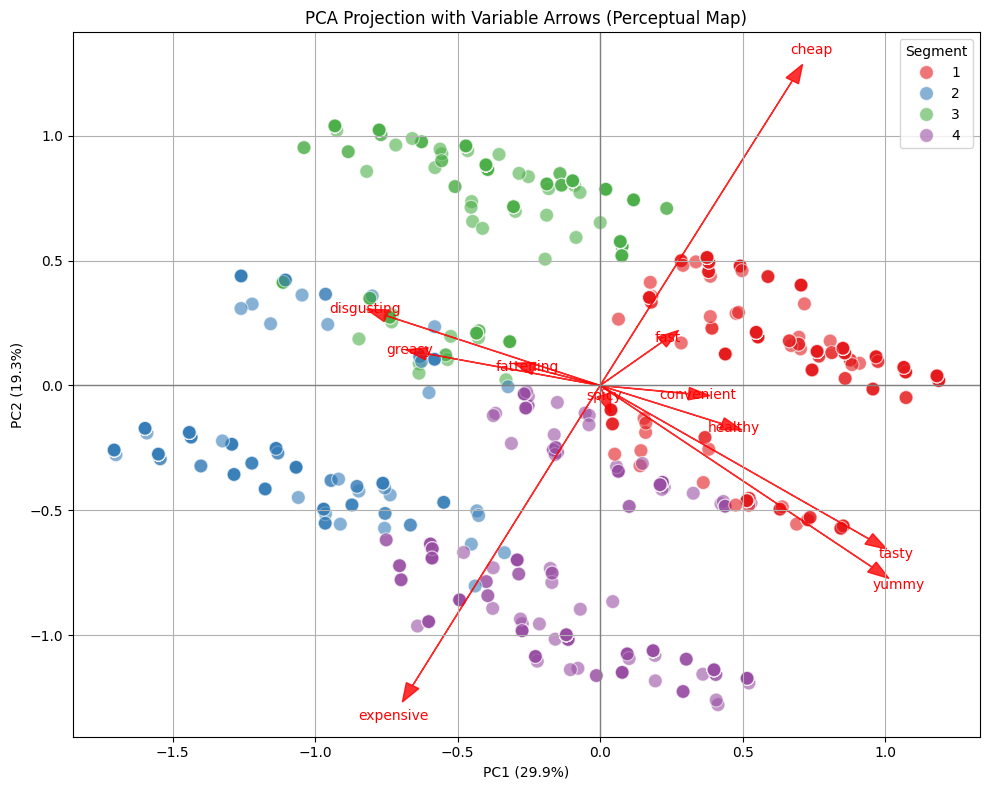

In [96]:
# Step 9: PCA with arrows (perceptual map style)
pca = PCA(n_components=2)
MD_pca = pca.fit(X)
scores = MD_pca.transform(X)

plt.figure(figsize=(10, 8))
# Plot data points colored by segment
sns.scatterplot(x=scores[:, 0], y=scores[:, 1], hue=MD["Segment"], palette="Set1", s=100, alpha=0.6)

# Add arrows for loadings (variable vectors)
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, MD_pca.components_[0, i]*2, MD_pca.components_[1, i]*2,
              color='red', head_width=0.05, alpha=0.8)
    plt.text(MD_pca.components_[0, i]*2.2, MD_pca.components_[1, i]*2.2,
             var, color='red', ha='center', va='center')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Projection with Variable Arrows (Perceptual Map)')
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True)
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


**A.7 Step 7: Describing Segments**

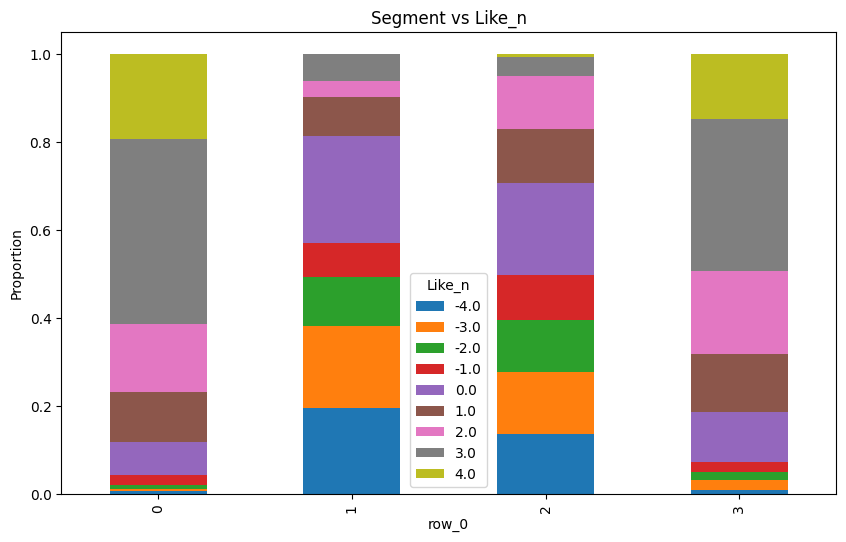

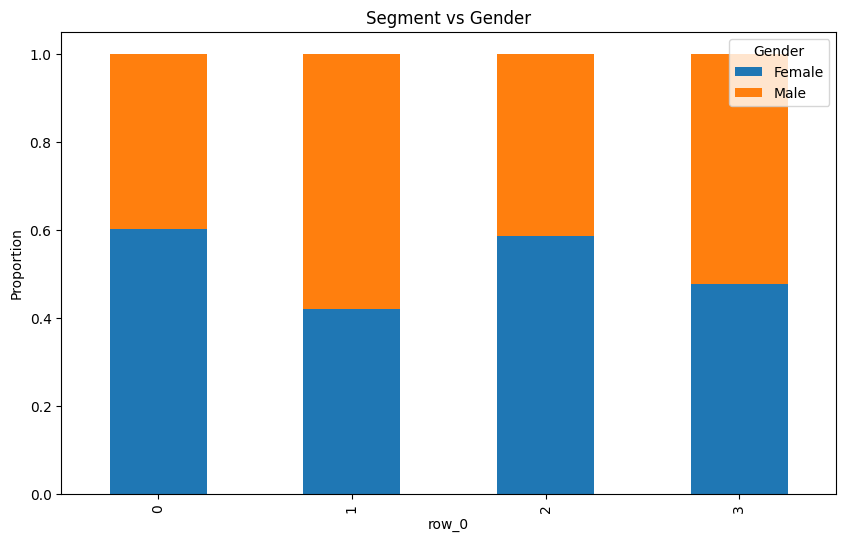

In [91]:
# 3. Mosaic plots (approximated with stacked bars)
def mosaic_plot(data, cluster_labels, var_name):
    cross_tab = pd.crosstab(cluster_labels, data[var_name], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Segment vs {var_name}')
    plt.ylabel('Proportion')
    plt.show()

# Convert 'Like' values to numeric
like_mapping = {
    '-3': -3, '-2': -2, '-1': -1, '0': 0, 
    '+1': 1, '+2': 2, '+3': 3,
    'I hate it!-3': -3, 'I don\'t like it!-2': -2, 
    'Neutral0': 0, 'I like it!+2': 2, 'I love it!+3': 3,
    'I love it!+5': 3  # if this exists, map to +3 or another sensible value
}

mcdonalds['Like_n'] = mcdonalds['Like'].replace(like_mapping)
mcdonalds['Like_n'] = pd.to_numeric(mcdonalds['Like_n'], errors='coerce')  # Coerce unrecognized to NaN

# Plot mosaic-style charts
mosaic_plot(mcdonalds, MD_k4.labels_, 'Like_n')
mosaic_plot(mcdonalds, MD_k4.labels_, 'Gender')



<Figure size 800x600 with 0 Axes>

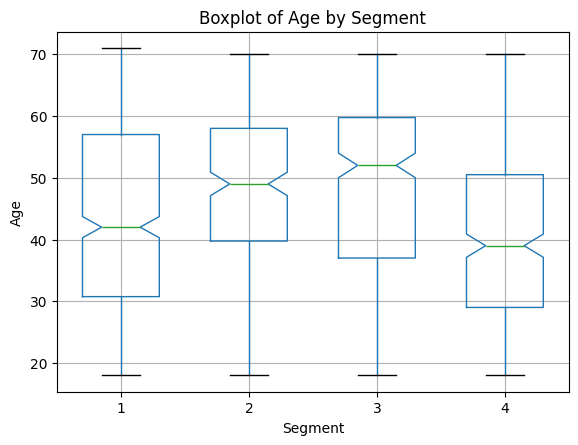

In [92]:
import matplotlib.pyplot as plt

# Step 1: Extract cluster labels from the fitted KMeans object
MD["Segment"] = MD_k4.labels_ + 1  # Now we correctly add 1 to make it 1–4 like in R

#  Step 2: Create the boxplot using pandas (most R-like)
plt.figure(figsize=(8, 6))
MD.boxplot(column="Age", by="Segment", grid=True, notch=True, widths=0.6)
plt.title("Boxplot of Age by Segment")
plt.suptitle("")  # Removes default title
plt.xlabel("Segment")
plt.ylabel("Age")
plt.show()


**A.8 Step 8: Selecting (the) Target Segment(s)**

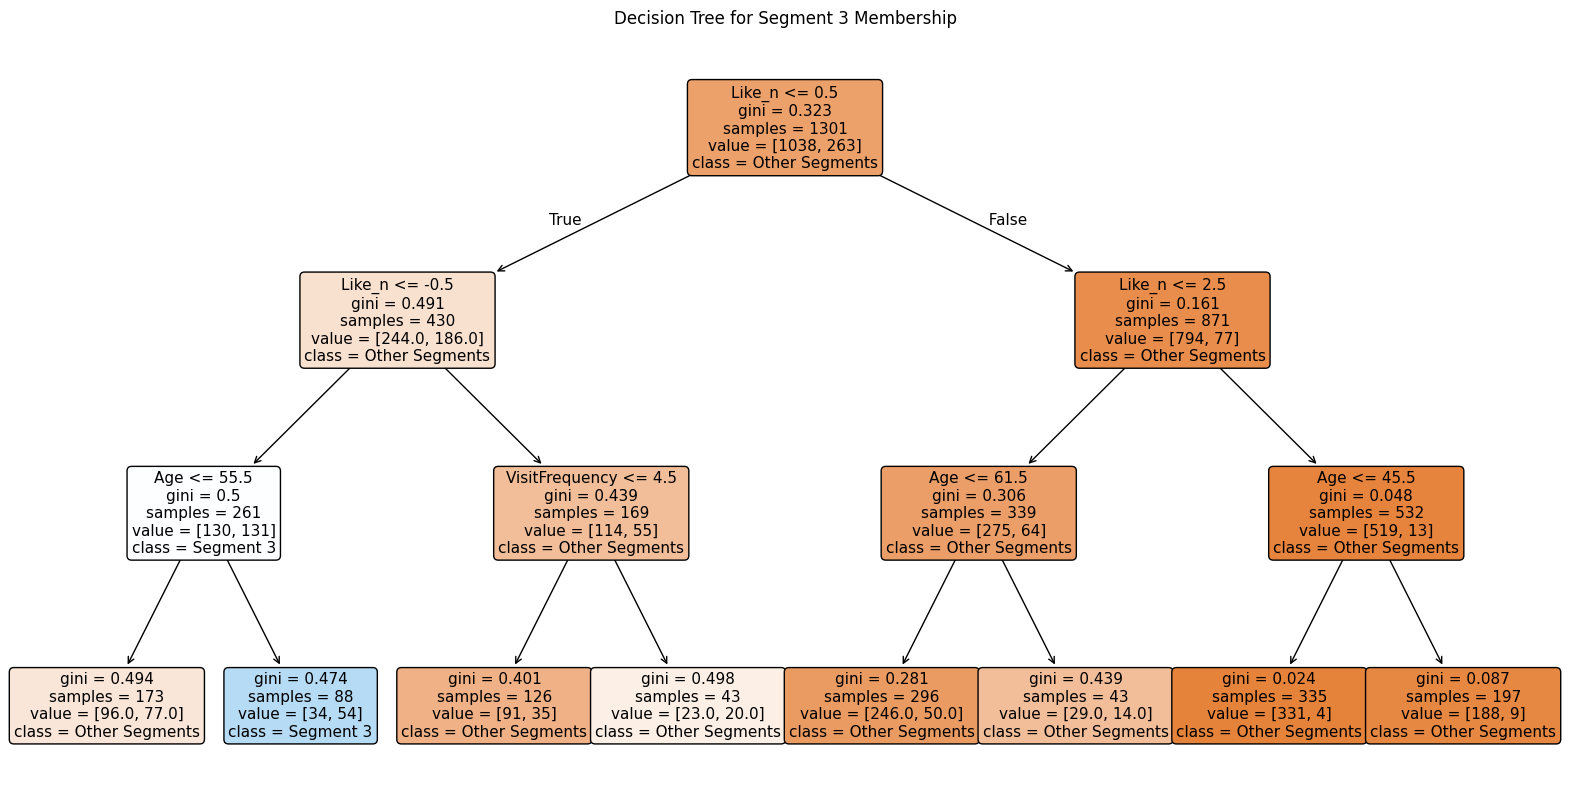

In [93]:
# 4. Decision Tree 
features = pd.DataFrame({
    'Like_n': mcdonalds['Like_n'],
    'Age': mcdonalds['Age'],
    'VisitFrequency': mcdonalds['VisitFrequency'].astype('category').cat.codes,
    'Gender': (mcdonalds['Gender'] == 'Female').astype(int)
})

target = (MD_k4.labels_ == 2).astype(int)  # Segment 3 (index 2)

# Remove any rows with missing values (optional but safer)
valid_rows = features.notnull().all(axis=1)
features = features[valid_rows]
target = target[valid_rows]

clf = DecisionTreeClassifier(max_depth=3, random_state=1234)
clf.fit(features, target)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, 
          class_names=['Other Segments', 'Segment 3'], 
          filled=True, rounded=True)
plt.title('Decision Tree for Segment 3 Membership')
plt.show()



Segment Profiles:
   VisitFrequency    Liking  FemaleProportion
0        2.584483  2.375000          0.601724
1        2.671053 -1.291667          0.421053
2        2.801242 -0.787072          0.586957
3        2.547988  1.974843          0.476780


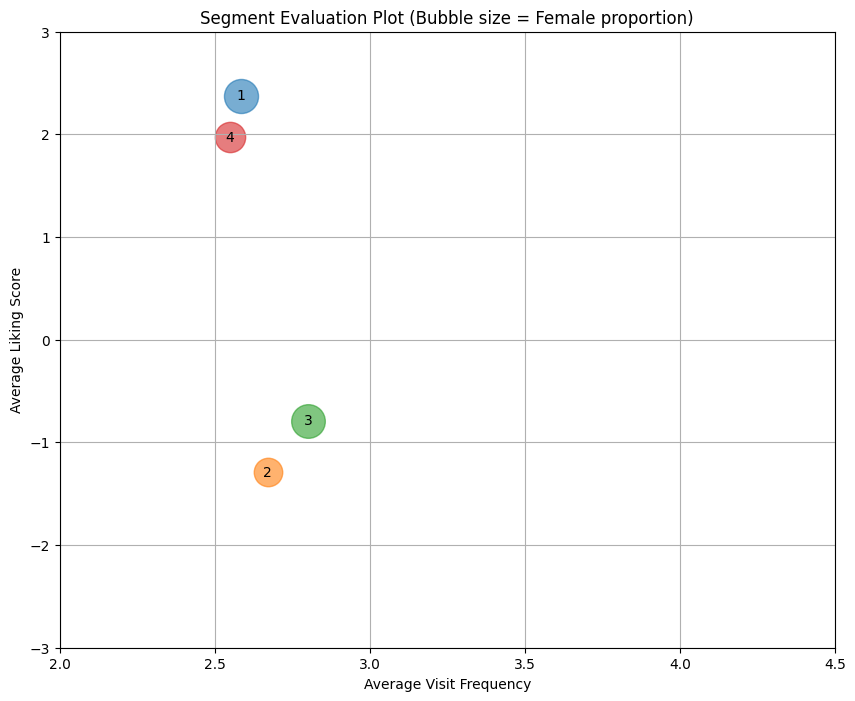

In [94]:

# 5. Segment Profiling
mcdonalds['Visit_n'] = mcdonalds['VisitFrequency'].astype('category').cat.codes

segment_profiles = mcdonalds.groupby(MD_k4.labels_).agg({
    'Visit_n': 'mean',
    'Like_n': 'mean',
    'Gender': lambda x: (x == 'Female').mean()
}).rename(columns={
    'Visit_n': 'VisitFrequency',
    'Like_n': 'Liking',
    'Gender': 'FemaleProportion'
})

print("\nSegment Profiles:")
print(segment_profiles)

# 6. Segment Evaluation Plot
plt.figure(figsize=(10, 8))
sizes = segment_profiles['FemaleProportion'] * 1000  # For bubble size

for i in range(4):
    plt.scatter(segment_profiles['VisitFrequency'][i], 
                segment_profiles['Liking'][i], 
                s=sizes[i], alpha=0.6)
    plt.text(segment_profiles['VisitFrequency'][i], 
             segment_profiles['Liking'][i], 
             str(i+1), ha='center', va='center')

plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Liking Score')
plt.title('Segment Evaluation Plot (Bubble size = Female proportion)')
plt.grid()
plt.show()


In [ ]:
#0000000000000000000000000000000---END---000000000000000000000000000000000000